In [9]:
import brainio
from brainio.assemblies import walk_coords
import numpy as np

raw_assembly = brainio.get_assembly('dicarlo.MajajHong2015.temporal')
raw_assembly = raw_assembly.sel(region='IT')
# adjust to new format
raw_assembly['region'] = 'neuroid', ['IT'] * len(raw_assembly['neuroid'])
raw_assembly['time_bin_start_ms'] = raw_assembly['time_bin_start']
raw_assembly['time_bin_stop_ms'] = raw_assembly['time_bin_end']
raw_assembly['image_label'] = raw_assembly['category_name']
# for some reason, there are nan object_names
stimuli_filter = [isinstance(v, str) or not np.isnan(v) for v in raw_assembly['object_name'].values]
raw_assembly = raw_assembly[{'presentation': stimuli_filter}]
raw_assembly = type(raw_assembly)(raw_assembly.values, coords={
    coord: (dims, values) for coord, dims, values in walk_coords(raw_assembly)},
                                       dims=raw_assembly.dims)  # reindex
print(raw_assembly)

<xarray.NeuronRecordingAssembly (neuroid: 168, presentation: 269440,
                                 time_bin: 39)>
array([[[ 1.3459798 , -0.67358875, -0.63187766, ...,  1.4726207 ,
         -0.32530496, -1.456868  ],
        [ 2.2432997 ,  0.2050053 , -0.63187766, ...,  0.58904827,
         -0.32530496,  1.1654944 ],
        [-0.44865993, -1.5521828 , -1.493529  , ..., -0.2945242 ,
          1.4490856 ,  0.29137364],
        ...,
        [-0.08917621,  1.3471167 , -0.09171911, ..., -1.5594519 ,
          0.4640704 ,  1.9638064 ],
        [-0.08917621, -0.4490389 ,  0.8254717 , ..., -0.6421273 ,
         -0.4640704 ,  1.0286605 ],
        [ 0.27305073,  1.2439029 ,  0.4396149 , ..., -1.5469488 ,
         -0.37123045,  0.7218308 ]],

       [[ 0.841973  ,  1.8187667 ,  0.8803161 , ..., -1.644908  ,
         -1.0615014 , -0.24362022],
        [ 0.841973  ,  1.0163696 ,  0.08002876, ..., -0.0530615 ,
         -0.26537532, -1.0556878 ],
        [ 0.        , -0.5884245 ,  0.08002876, ...,

In [10]:
from pipeline_analysis import print_assembly_info

print_assembly_info(raw_assembly)

unique images: 5760
repetitions: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), array([5760, 5760, 5760, 5760, 5760, 5760, 5760, 5760, 5760, 5760, 5760,
       5760, 5760, 5760, 5760, 5760, 5760, 5760, 5760, 5760, 5760, 5760,
       5760, 5760, 5760, 5760, 5760, 5760, 5760, 5120, 5120, 5120, 5120,
       5120, 5120, 5120, 5120, 5120, 5120, 5120, 5120, 5120, 5120, 5120,
       5120, 5120, 5120, 2560, 2560, 2560, 2560]))

unique neuroid_ids: 168
regions: ['IT']
subregions: ['aIT', 'cIT', 'pIT']

time bins: [(-100, -80), (-90, -70), (-80, -60), (-70, -50), (-60, -40), (-50, -30), (-40, -20), (-30, -10), (-20, 0), (-10, 10), (0, 20), (10, 30), (20, 40), (30, 50), (40, 60), (50, 70), (60, 80), (70, 90), (80, 100), (90, 110), (100, 120), (110, 130), (120, 140), (130, 150), (140, 160), (150, 170), (160, 180), (170,

## filter neuroids

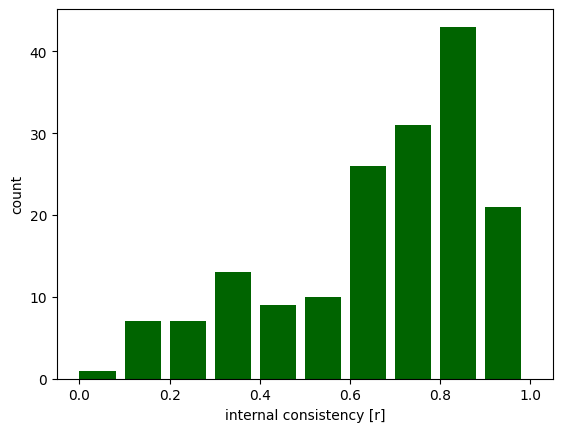

In [3]:
from pipeline_analysis.internal_consistency import plot_consistencies

plot_consistencies(raw_assembly)

plot cumulative

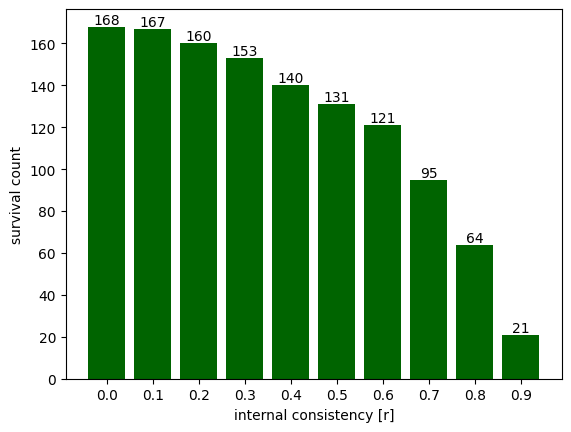

In [4]:
from pipeline_analysis.internal_consistency import plot_consistencies_survival_count

plot_consistencies_survival_count(raw_assembly)

In [11]:
from pipeline_analysis.internal_consistency import filter_assembly

filtered_assembly = filter_assembly(raw_assembly, consistency_threshold=0.7)
print(f"{len(filtered_assembly['neuroid'])} good neuroids > 0.7: {filtered_assembly['neuroid_id'].values}")

95 good neuroids > 0.7: ['Chabo_L_M_6_9' 'Chabo_L_M_5_8' 'Chabo_L_M_7_9' 'Chabo_L_M_6_8'
 'Chabo_L_M_7_8' 'Chabo_L_M_9_7' 'Chabo_L_M_7_7' 'Chabo_L_M_9_5'
 'Chabo_L_M_8_6' 'Chabo_L_M_9_4' 'Chabo_L_A_9_8' 'Chabo_L_A_8_7'
 'Chabo_L_A_7_5' 'Chabo_L_A_9_7' 'Chabo_L_A_9_6' 'Chabo_L_A_7_6'
 'Chabo_L_A_9_5' 'Chabo_L_A_8_6' 'Chabo_L_A_9_4' 'Chabo_L_A_8_5'
 'Chabo_L_A_8_4' 'Chabo_L_A_4_5' 'Chabo_L_A_4_4' 'Chabo_L_A_6_2'
 'Chabo_L_A_6_3' 'Chabo_L_A_7_3' 'Chabo_L_A_7_4' 'Chabo_L_A_8_3'
 'Chabo_L_M_9_3' 'Chabo_L_M_9_1' 'Tito_L_M_4_7' 'Tito_L_M_5_8'
 'Tito_L_M_7_9' 'Tito_L_M_6_8' 'Tito_L_M_7_8' 'Tito_L_M_6_7'
 'Tito_L_M_8_8' 'Tito_L_M_5_7' 'Tito_L_M_9_8' 'Tito_L_M_6_6'
 'Tito_L_M_8_7' 'Tito_L_M_7_5' 'Tito_L_M_9_7' 'Tito_L_M_7_6'
 'Tito_L_M_9_5' 'Tito_L_M_8_6' 'Tito_L_M_9_4' 'Tito_L_M_8_5'
 'Tito_L_M_9_3' 'Tito_L_M_8_4' 'Tito_L_M_3_6' 'Tito_L_M_3_5'
 'Tito_L_M_2_4' 'Tito_L_M_4_5' 'Tito_L_M_3_4' 'Tito_L_M_2_3'
 'Tito_L_M_5_4' 'Tito_L_M_3_3' 'Tito_L_M_6_4' 'Tito_L_M_5_5'
 'Tito_L_A_8_8' 'Tito_L_A_9_7' 

plot consistencies over time

time_bin: 100%|██████████| 39/39 [1:03:01<00:00, 96.96s/it]


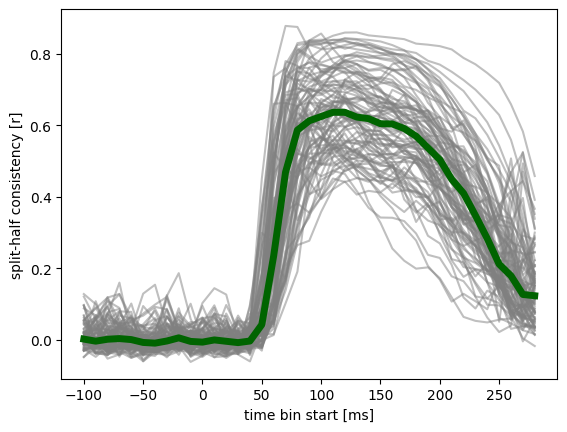

In [6]:
from pipeline_analysis.internal_consistency import plot_internal_consistency_over_time
plot_internal_consistency_over_time(filtered_assembly)

## average out repetitions and time

In [12]:
from pipeline_analysis import average_time_and_repetitions

assembly = average_time_and_repetitions(filtered_assembly)
print(assembly)

<xarray.NeuronRecordingAssembly (neuroid: 95, presentation: 5760)>
array([[-0.39839247,  0.00223596, -0.03167815, ...,  0.02652575,
        -0.12305886, -0.26729235],
       [-0.29926965, -0.06780353,  0.22327481, ...,  0.36629012,
        -0.20369563, -0.1436542 ],
       [-0.579189  , -0.15036966, -0.18156154, ...,  0.11520457,
        -0.22663552, -0.36384866],
       ...,
       [ 0.63026863,  0.7798509 ,  1.317541  , ...,  1.5724709 ,
         1.5097098 ,  1.1857486 ],
       [ 0.93692565,  0.64688945,  0.44537002, ...,  0.6314867 ,
         0.4975672 ,  0.4663727 ],
       [ 1.1879253 ,  1.032158  ,  1.1525762 , ...,  1.1280624 ,
         1.1571466 ,  0.9067239 ]], dtype=float32)
Coordinates:
  * neuroid          (neuroid) MultiIndex
  - neuroid_id       (neuroid) object 'Chabo_L_M_6_9' ... 'Tito_L_M_7_1'
  - arr              (neuroid) object 'M' 'M' 'M' 'M' 'M' ... 'M' 'M' 'M' 'M'
  - col              (neuroid) int64 9 8 9 8 8 7 7 5 6 4 ... 0 1 1 0 1 0 1 0 0 1
  - hemisphere    

## Readout capability

In [13]:
from pipeline_analysis.readout_performance import plot_sites_vs_accuracy

plot_sites_vs_accuracy(assembly)

num sites:   0%|          | 0/5 [00:01<?, ?it/s]


ValueError: Found input variables with inconsistent numbers of samples: [95, 5184]